In [1]:
import pandas as pd
data = pd.read_csv('http://hosho.ees.hokudai.ac.jp/~kubo/stat/iwanamibook/fig/hbm/data7a.csv')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

y,0,1,2,3,4,5,6,7,8
id,1074,691,459,137,315,192,402,830,950


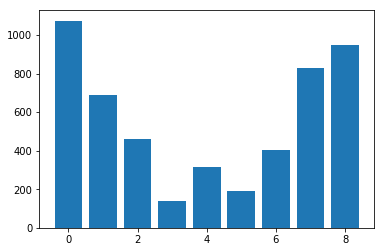

In [3]:
plt.bar(range(9), data.groupby('y').sum().id)
data.groupby('y').sum().T

In [4]:
Y = np.array(data.y)[:6]

In [5]:
import pymc3 as pm
import theano.tensor as T

In [6]:
def invlogit(v):
    return T.exp(v) / (T.exp(v) + 1)

In [7]:
with pm.Model() as model_hier:
    s = pm.Uniform('s', 0, 1.0E+2)
    beta = pm.Normal('beta', 0, 1.0E+2)
    r = pm.Normal('r', 0, s, shape=len(Y))
    q = invlogit(beta+r)
    y = pm.Binomial('y', 8, q, observed=Y)
    
    step = pm.Slice([s, beta, r])
    trace_hier = pm.sample(1000, step)

/home/fukami/.pyenv/versions/anaconda-2.4.0/envs/anac-2.4/lib/python2.7/site-packages/pymc3/sampling.py:163: UserWarning: Instantiated step methods cannot be automatically initialized. init argument ignored.
  warnings.warn('Instantiated step methods cannot be automatically initialized. init argument ignored.')
100%|██████████| 1000/1000 [00:01<00:00, 565.70it/s]


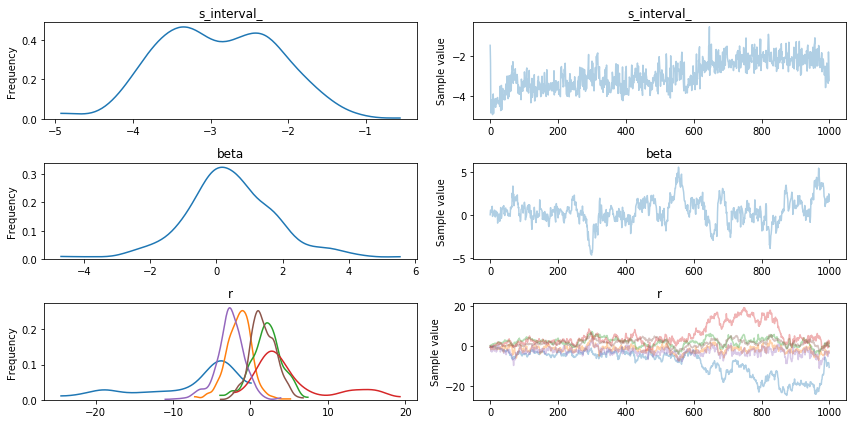

In [8]:
with model_hier:
    pm.traceplot(trace_hier, model_hier.vars)